In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv("loan-train.csv")
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
test_data = pd.read_csv("loan-test.csv")
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
train_data_columns = train_data.columns
train_data_columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
print("Total Rows: ", len(train_data))

Total Rows:  614


In [6]:
print("Total Columns: ", len(train_data_columns))

Total Columns:  13


In [7]:
print("Shape: ", train_data.shape)

Shape:  (614, 13)


In [8]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
def explore_object_type(train_data, feature_name):
    if(train_data[feature_name].dtype == object):
        print("\n", feature_name)
        print(train_data[feature_name].value_counts())

In [11]:
explore_object_type(train_data, "Gender")


 Gender
Male      489
Female    112
Name: Gender, dtype: int64


In [41]:
for feature_name in train_data_columns:
    explore_object_type(train_data, feature_name)


 Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

 Gender
Male      489
Female    112
Name: Gender, dtype: int64

 Married
Yes    398
No     213
Name: Married, dtype: int64

 Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

 Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

 Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64

 Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

 Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64


In [12]:
import missingno as msno

In [13]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot: >

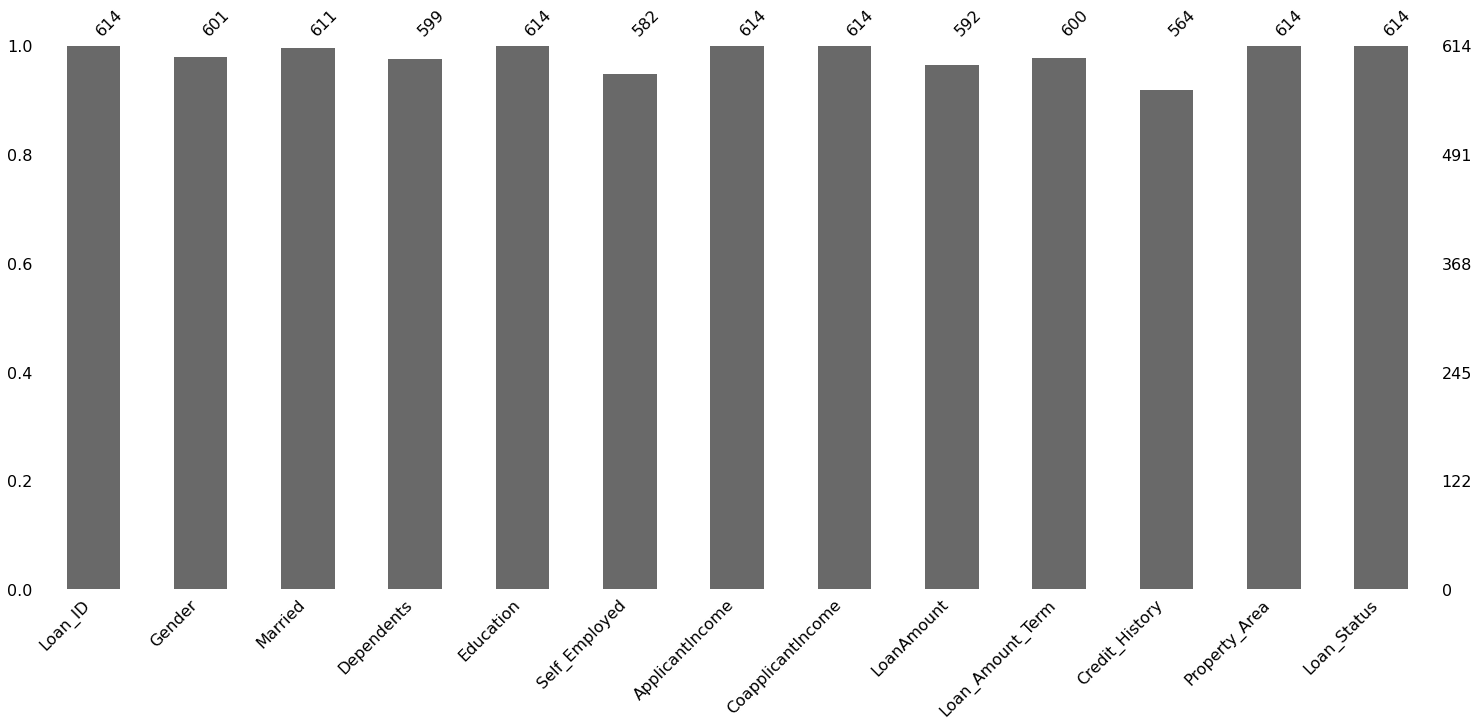

In [14]:
msno.bar(train_data)

<AxesSubplot: >

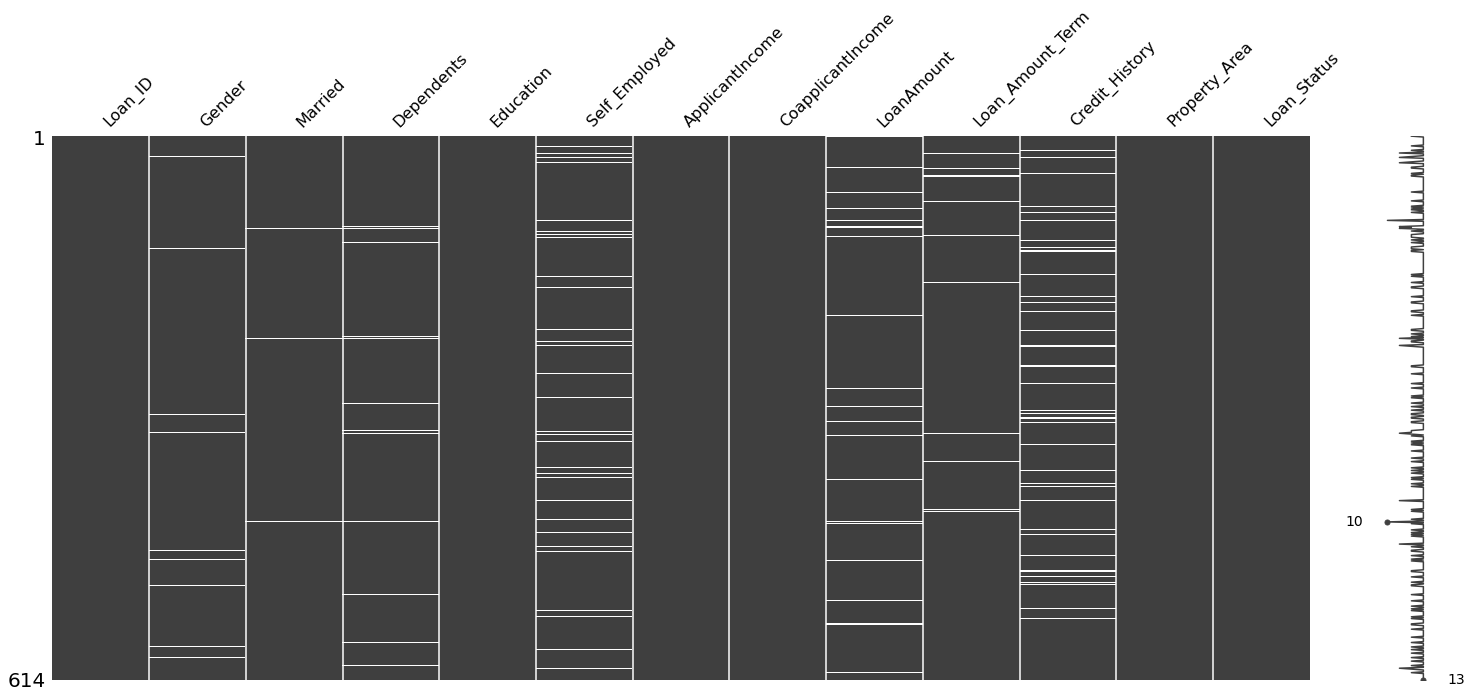

In [15]:
msno.matrix(train_data)

In [16]:
train_data["Credit_History"].fillna(train_data["Credit_History"].mean(), inplace = True)
test_data["Credit_History"].fillna(test_data["Credit_History"].mean(), inplace = True)

train_data["LoanAmount"].fillna(train_data["LoanAmount"].mean(), inplace = True)
test_data["LoanAmount"].fillna(test_data["LoanAmount"].mean(), inplace = True)

In [17]:
train_data.Loan_Status = train_data.Loan_Status.replace({"Y" : 1, "N" : 0})

train_data.Gender = train_data.Gender.replace({"Male" : 1, "Female" : 0})
test_data.Gender = test_data.Gender.replace({"Male" : 1, "Female": 0})

train_data.Married = train_data.Married.replace({"Yes" : 1, "No" : 0})
test_data.Married = test_data.Married.replace({"Yes" : 1, "No" : 0})

train_data.Self_Employed = train_data.Self_Employed.replace({"Yes" : 1, "No" : 0})
test_data.Self_Employed = test_data.Self_Employed.replace({"Yes" : 1, "No" : 0})

In [18]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
test_data['Gender'].fillna(test_data['Gender'].mode()[0], inplace=True)

train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0], inplace=True)

train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
test_data['Married'].fillna(test_data['Married'].mode()[0], inplace=True)

In [19]:
from sklearn.preprocessing import LabelEncoder
feature_col = ["Education", "Dependents", "Property_Area"]
encoder = LabelEncoder()
for col in feature_col:
    train_data[col] = encoder.fit_transform(train_data[col])
    test_data[col] = encoder.fit_transform(test_data[col])

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,0,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,0,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,0,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,1,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,0,0.0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,0,0.0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1.0,1.0,3,0,0.0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1.0,1.0,1,0,0.0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1.0,1.0,2,0,0.0,7583,0.0,187.000000,360.0,1.0,2,1


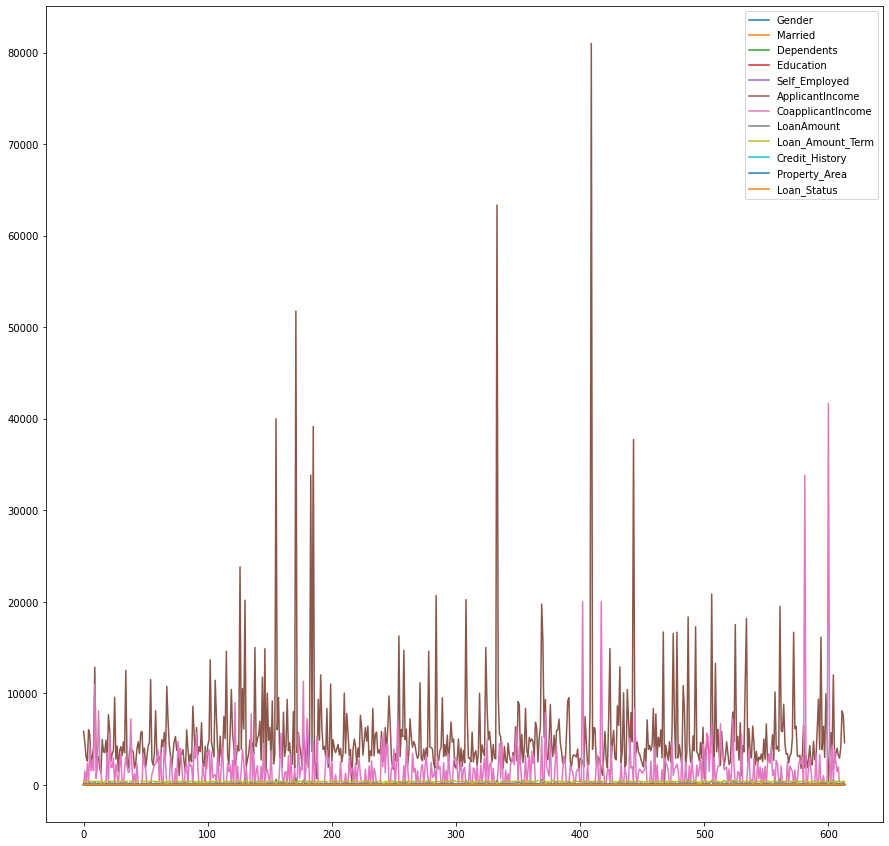

In [63]:
train_data.plot(figsize = (15, 15))

plt.show()

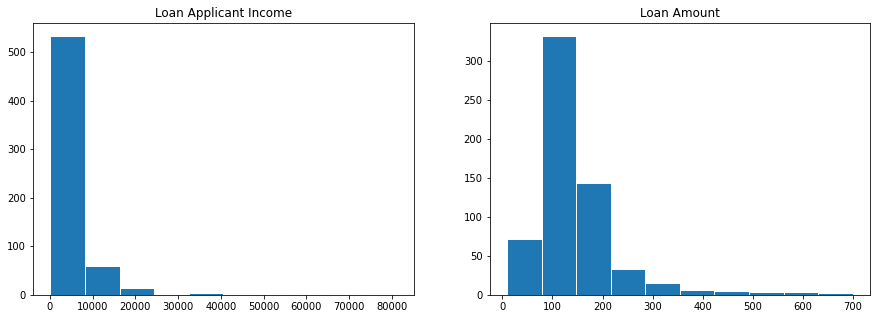

In [23]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

train_data["ApplicantIncome"].hist(edgecolor = "white")
plt.title("Loan Applicant Income")

plt.grid()

plt.subplot(1, 2, 2)

train_data["LoanAmount"].hist(edgecolor = "white")
plt.title("Loan Amount")

plt.grid()

plt.show()

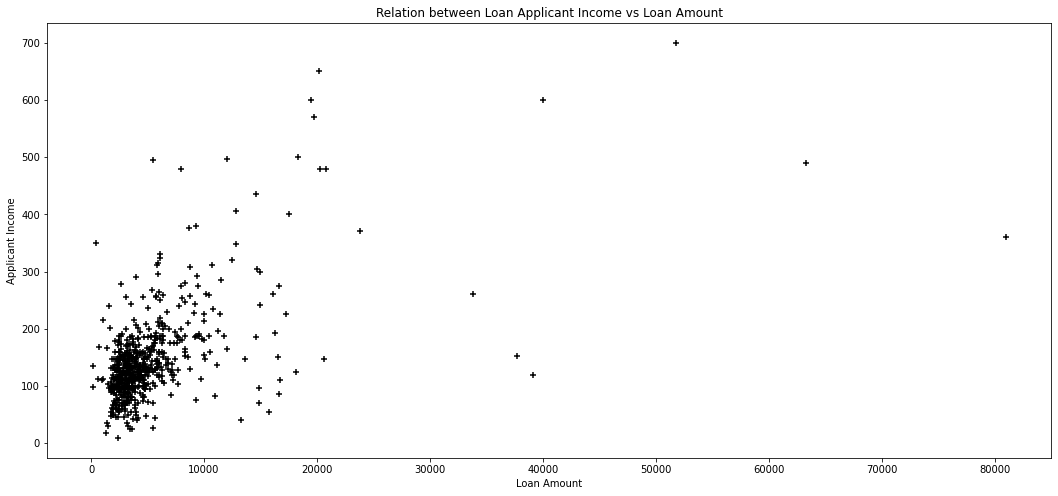

In [24]:
plt.figure(figsize = (18, 8))
plt.title("Relation between Loan Applicant Income vs Loan Amount")

plt.scatter(train_data["ApplicantIncome"], train_data["LoanAmount"], color = "black", marker = "+")
plt.xlabel("Loan Amount")
plt.ylabel("Applicant Income")

plt.show()

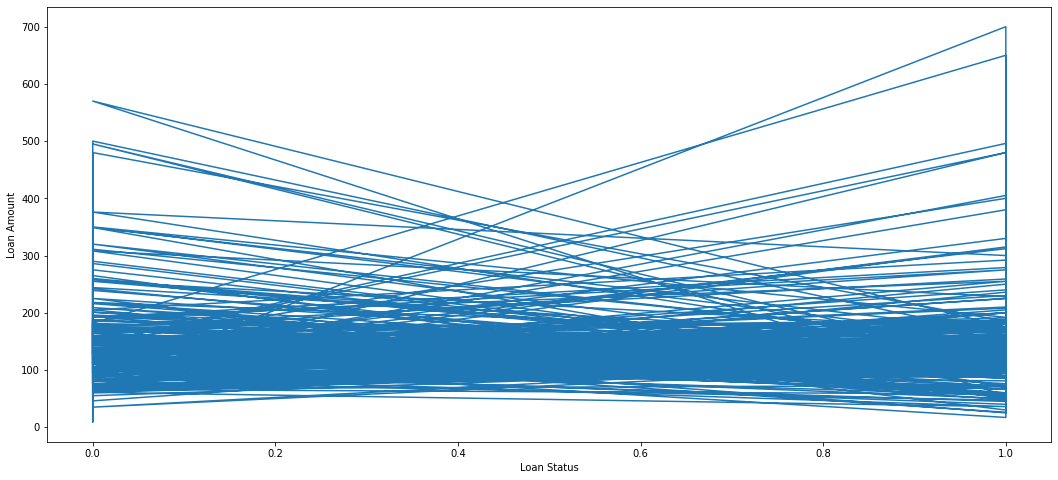

In [25]:
plt.figure(figsize = (18, 8))

plt.plot(train_data["Loan_Status"], train_data["LoanAmount"])
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")

plt.show()

C:\Users\baibh\AppData\Local\Temp\ipykernel_6264\666194411.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), cmap = "coolwarm", annot = True, fmt = ".1f", linewidths = .1)


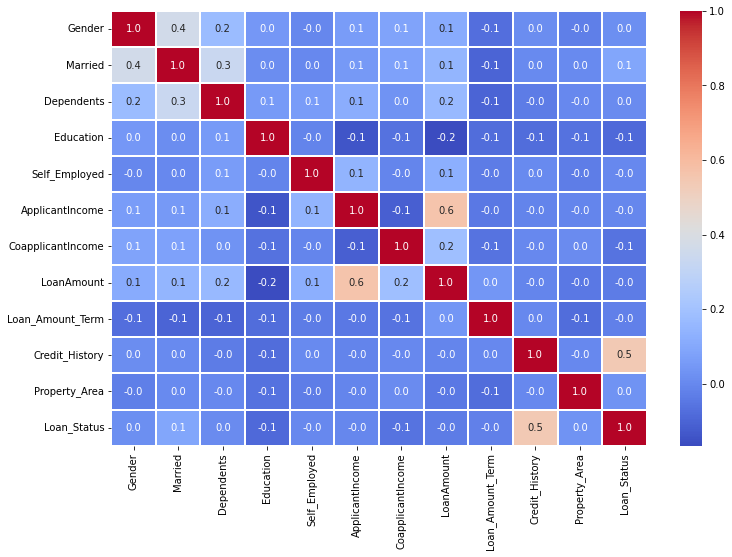

In [26]:
plt.figure(figsize = (12, 8))

sns.heatmap(train_data.corr(), cmap = "coolwarm", annot = True, fmt = ".1f", linewidths = .1)

plt.show()

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [34]:
logistic_model = LogisticRegression()

In [87]:
train_features = ["Credit_History", "Education", "Gender"]
x_train = train_data[train_features].values
y_train = train_data["Loan_Status"].values

logistic_model.fit(x_train, y_train)

LogisticRegression()

LogisticRegression()

In [44]:
test_data.shape

(367, 12)

In [49]:
print("Model Coeffecient: ", logistic_model.coef_)

Model Coeffecient:  [[ 3.316164   -0.3059193   0.09398266]]


In [50]:
print("Model Intercept: ", logistic_model.intercept_)

Model Intercept:  [-1.98307795]


In [45]:
score = logistic_model.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.8094462540716613
accuracy_score percent : 80.94


In [46]:
predict_test = logistic_model.predict(x_test)
print('Target on test data',predict_test) 

Target on test data [1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
